### Must create contours of fractional deviation between single lens and triple lens
- Plot contour deviations at the following levels: (0.01, 0.03, 0.10, 0.30)

- $\delta = \dfrac{Triple - Single}{Single}$
- Must center the single lens at a point that results in 0 deviation far away from central caustic
- Use three different source sizes: (1e-3, 3e-3, 1e-2)
- Draw multiple light curves of different paths for single lens, triple lens, and fractional deviation

In [1]:
import platform
import psutil

print(platform.machine())
print(platform.version())
print(platform.system())
print(platform.processor())

memory = psutil.virtual_memory()

print(memory.total / (1024 ** 3))
print(memory.used / (1024 ** 3))
print(memory.available / (1024 ** 3))

x86_64
#1 SMP Mon Dec 2 06:32:20 EST 2024
Linux
x86_64
7.485950469970703
3.66546630859375
3.5292129516601562


In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')

from IRSMicroLensing import IRSCaustics as IRSC
from IRSMicroLensing import IRSFunctions as IRSF

#### Readying attributes of triple lens system and single lens

In [2]:
# Big planet parameters
s1 = 0.8
alpha1 = 0
q1 = 1e-3

# Small planet parameters
s2 = 0.8
alpha2 = 30
q2 = 1e-3 * q1

# Annulus parameters
num_theta = 8000
num_r = 4 * num_theta

single_lens_attributes = [
    [0, 0, 0.001, 1]
]

triple_lens_attributes = [
    [0, 0, 0.001, 1],
    [s1*np.cos(np.deg2rad(alpha1)), s1*np.sin(np.deg2rad(alpha1)), 0.001, q1],
    [s2*np.cos(np.deg2rad(alpha2)), s2*np.sin(np.deg2rad(alpha2)), 0.001, q2]
]

ang_width, thickness, (y_plus, y_minus), cusp_points = IRSC.IRSCaustics.ang_width_thickness_calculator(triple_lens_attributes)

print(ang_width)
print(thickness)
print(y_plus, y_minus)

single_lens_parameters = {
    'pixels': 1000,
    'ang_width': ang_width,
    'thickness': thickness,
    'y_plus': y_plus,
    'y_minus': y_minus,
    'lens_att': single_lens_attributes,
    'num_theta': num_theta,
    'num_r': num_r
}

triple_lens_parameters = single_lens_parameters.copy()
triple_lens_parameters.update({
    'lens_att': triple_lens_attributes
})

print(f'Number of rays: {(num_r * num_theta):.4e}')

0.07680319680319682
0.059738867403980045
1.030315425782361 -0.970576558378381
Number of rays: 2.5600e+08


#### Simulating single lens magnification map

Creating mesh grid: 0.538 seconds
Calculating source pixels: 4.78 seconds
Calculating indices of translated pixel after deflection: 1.114 seconds
Calculating translated pixels: 2.172 seconds
Sorting translated pixels: 2.172 seconds
Finding pixel repetitions and counts: 1.004 seconds
Incrementing pixel magnifications based on counts and repetitions: 0.402 seconds
Plotting magnification map: 0.038 seconds
---------------------
Total time: 10.061 seconds


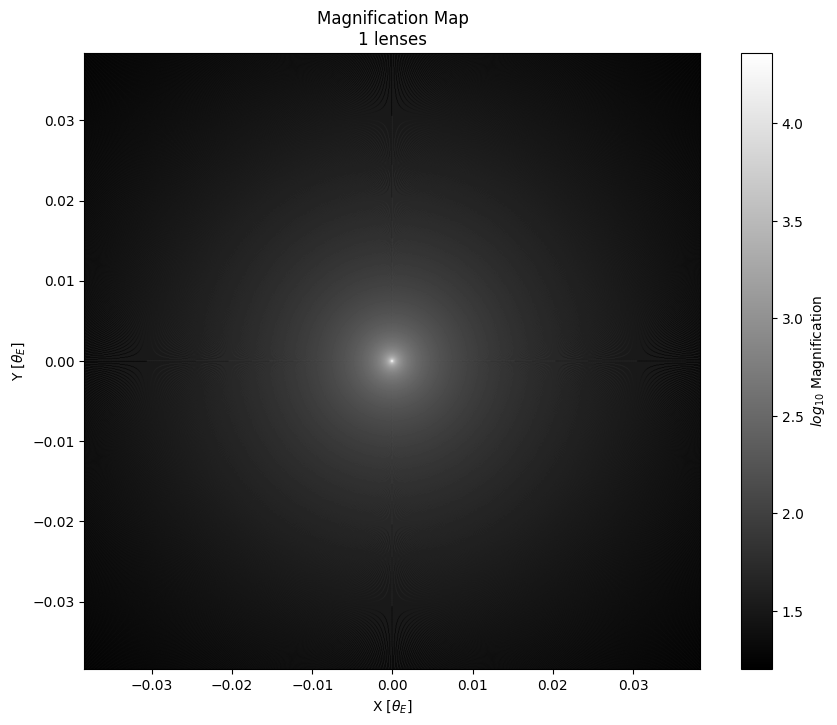

In [3]:
single_lens = IRSC.IRSCaustics(annulus_param_dict=single_lens_parameters)
single_lens_magnifications = single_lens.plot(cm_offset='auto')

plt.show()

Creating mesh grid: 0.59 seconds
Calculating source pixels: 52.571 seconds
Calculating indices of translated pixel after deflection: 7.631 seconds
Calculating translated pixels: 9.785 seconds
Sorting translated pixels: 9.785 seconds
Finding pixel repetitions and counts: 2.365 seconds
Incrementing pixel magnifications based on counts and repetitions: 0.687 seconds
Plotting magnification map: 0.214 seconds
---------------------
Total time: 73.886 seconds


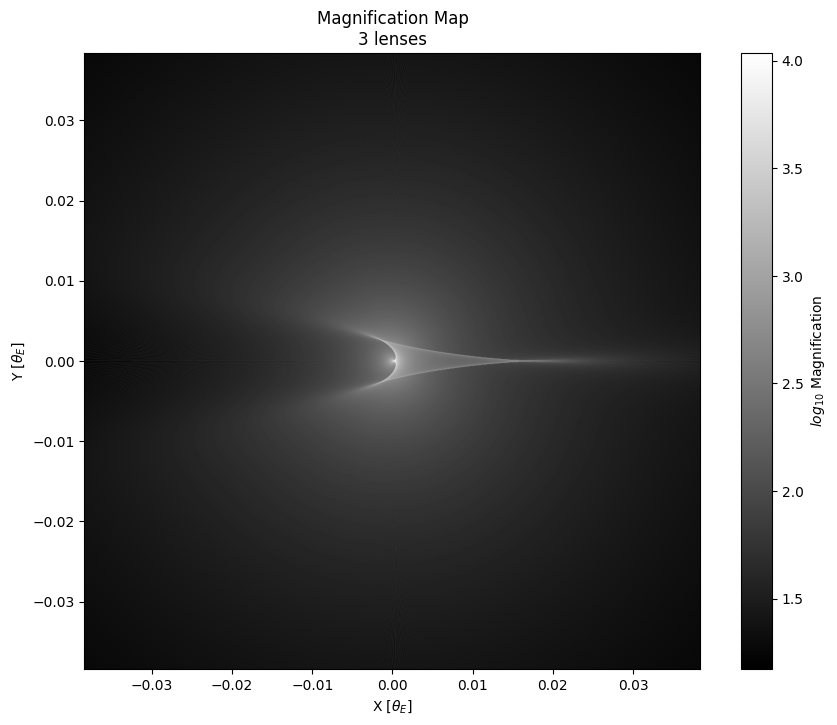

In [3]:
triple_lens = IRSC.IRSCaustics(annulus_param_dict=triple_lens_parameters)
triple_lens_magnifications = triple_lens.plot(cm_offset='auto')

plt.show()

#### Defining source profile

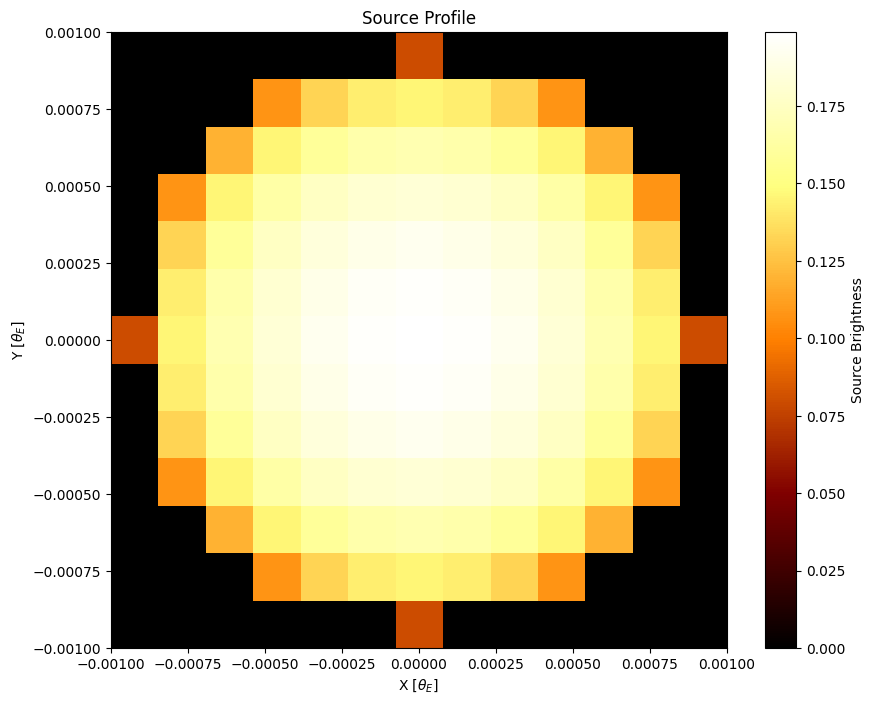

In [5]:
radius = 1e-3
LD = 0.5

source_profile = IRSF.IRSFunctions.source_profile(ang_res=single_lens.param_dict['ang_res'], rad=radius, profile_type='LD', LD=LD)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

img = ax.imshow(source_profile, cmap='afmhot', extent=[-radius, radius, -radius, radius])
plt.colorbar(img, ax=ax, label='Source Brightness')

ax.set_xlabel('X [$\\theta_E$]')
ax.set_ylabel('Y [$\\theta_E$]')
ax.set_title('Source Profile')

ax.set_aspect('equal')

plt.show()

#### Convolving source profile with both single lens and triple lens magnification maps

Convolving source profile with magnification map: 0.035 seconds
Convolving source profile with magnification map: 0.024 seconds


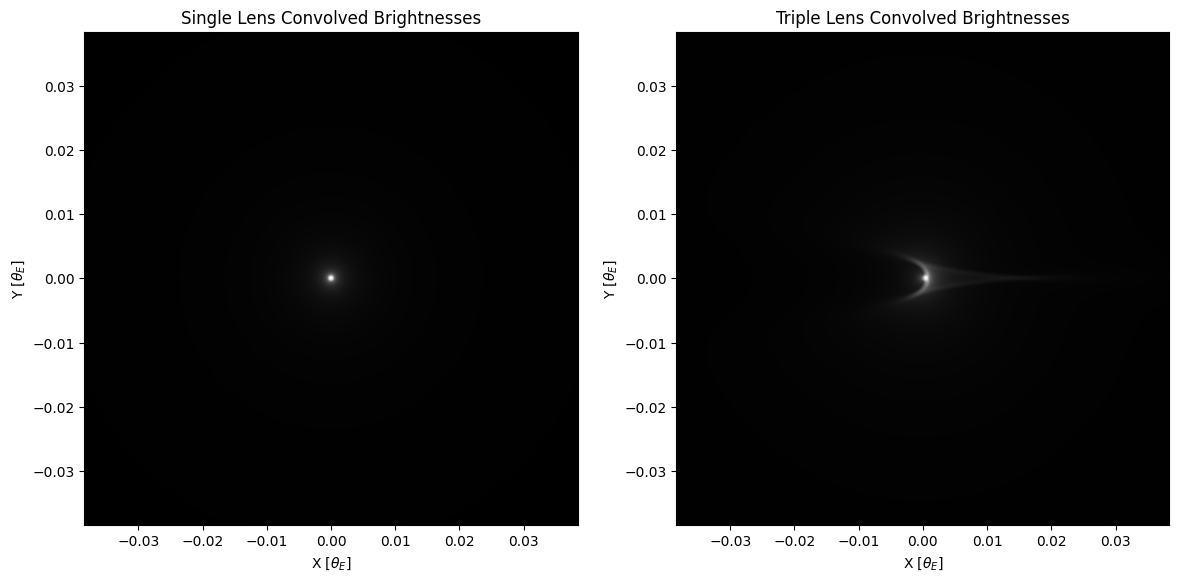

In [8]:
convolved_single_lens = single_lens.convolve(source_profile=source_profile)
convolved_triple_lens = triple_lens.convolve(source_profile=source_profile)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.imshow(convolved_single_lens, cmap='gray', extent=[-single_lens.ang_width/2, single_lens.ang_width/2, -single_lens.ang_width/2, single_lens.ang_width/2])
ax2.imshow(convolved_triple_lens, cmap='gray', extent=[-single_lens.ang_width/2, single_lens.ang_width/2, -single_lens.ang_width/2, single_lens.ang_width/2])

ax1.set_xlabel('X [$\\theta_E$]')
ax1.set_ylabel('Y [$\\theta_E$]')
ax1.set_title('Single Lens Convolved Brightnesses')
ax1.set_aspect('equal')

ax2.set_xlabel('X [$\\theta_E$]')
ax2.set_ylabel('Y [$\\theta_E$]')
ax2.set_title('Triple Lens Convolved Brightnesses')
ax2.set_aspect('equal')

plt.show()

#### First look at deviations

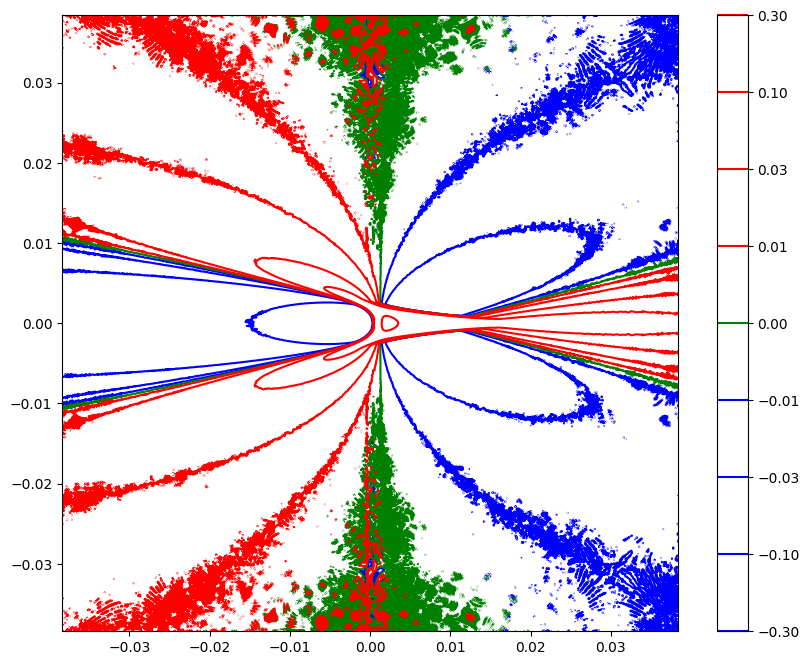

In [9]:
fractional_deviations = (convolved_triple_lens - convolved_single_lens) / convolved_single_lens

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

# img = ax.imshow(fractional_deviations, extent=[-ang_width/2, ang_width/2, -ang_width/2, ang_width/2], cmap='grey')

img = plt.contour(single_lens.X_pix, single_lens.Y_pix, fractional_deviations,
                   levels=[-0.30, -0.10, -0.03, -0.01, 0, 0.01, 0.03, 0.10, 0.30],
                   colors=['blue', 'blue', 'blue', 'blue', 'green', 'red', 'red', 'red', 'red']
)

plt.colorbar(img)

ax.set_aspect('equal')
ax.set_xlim(-ang_width/2, ang_width/2)
ax.set_ylim(-ang_width/2, ang_width/2)

fig.savefig('Contours.png')

plt.show()